In [40]:
#primitive ml libraries & data visualization tools
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

#vectorization and evaluation tools
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.preprocessing.text import Tokenizer

#ml libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

#save and load trained model
import pickle

In [41]:
#loading the dataset
df = pd.read_csv('/Users/localadmin/Desktop/bda datasets/cleaned_multiclass_dataset.csv')
df.head()

,cleaned_text,label
0,"['word', 'food', 'crapilicious']",0
1,['white'],0
2,"['classy', 'whore', 'red', 'velvet', 'cupcake']",0
3,"['meh', 'p', 'thanks', 'head', 'concerned', 'a...",0
4,"['isi', 'account', 'pretending', 'kurdish', 'a...",0


In [42]:
print(df['label'].value_counts())

label
1    7998
2    7992
3    7973
4    7961
0    7945
5    7823
Name: count, dtype: int64


not_cyberbullying:0
religion:1
age:2
gender:3
ethnicity:4
other_cyberbullying:5


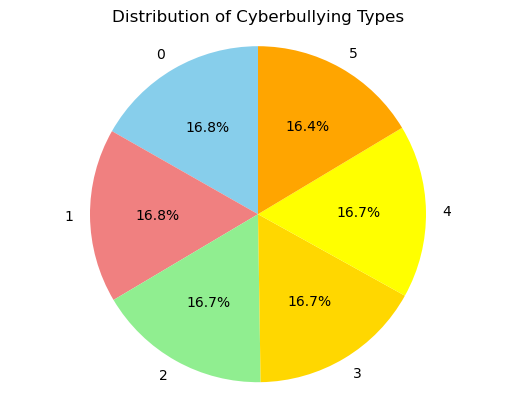

In [43]:
sizes = df['label'].value_counts()
plt.pie(sizes, labels=[0,1,2,3,4,5], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold','yellow','orange'])
plt.axis('equal')  
plt.title('Distribution of Cyberbullying Types')
print('not_cyberbullying:0')
print('religion:1')
print('age:2')
print('gender:3')
print('ethnicity:4')
print('other_cyberbullying:5')
# Show the plot
plt.show()

<Axes: xlabel='label'>

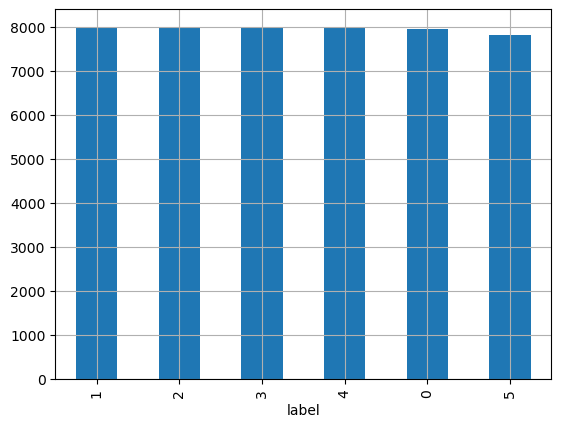

In [44]:
plt.show()
df['label'].value_counts().plot(kind='bar', grid=True)

In [45]:
x=df['cleaned_text']
print(x.shape)

(47692,)


In [46]:
y=df['label']
print(y.shape)

(47692,)


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,stratify=y, random_state=42)
print(x_train.shape,x_test.shape, y_train.shape,y_test.shape)

(33384,) (14308,) (33384,) (14308,)


In [48]:
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
print(x_train.shape)
print(x_train_tfidf.shape)
x_test_tfidf = tfidf_vectorizer.transform(x_test)
print(x_test.shape)
print(x_test_tfidf.shape)

(33384,)
(33384, 36810)
(14308,)
(14308, 36810)


In [49]:
with open('tfidf_vectorizer_multiclass.pkl','wb') as f:
    pickle.dump(tfidf_vectorizer,f)

# Machine Learning 

1) Logistic Regression

In [50]:
log_reg= LogisticRegression()

In [51]:
model_lr = log_reg.fit(x_train_tfidf,y_train)

In [52]:
y_pred_lr = log_reg.predict(x_test_tfidf)

In [57]:
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
accuracy    = accuracy_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
from sklearn.metrics import f1_score
f1_measure_lr = f1_score(y_test,y_pred_lr, average = 'macro')
print("F-measure:", f1_measure_lr)
print("Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.53      0.54      2384
           1       0.95      0.94      0.95      2399
           2       0.94      0.97      0.95      2398
           3       0.90      0.81      0.85      2392
           4       0.97      0.97      0.97      2388
           5       0.56      0.62      0.59      2347

    accuracy                           0.81     14308
   macro avg       0.81      0.81      0.81     14308
weighted avg       0.81      0.81      0.81     14308

F-measure: 0.8090680939035789
Accuracy: 0.8081492871121051


In [54]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(conf_matrix_lr)

[[1274   67   78   86   25  854]
 [  77 2253    3   10    8   48]
 [  46    0 2315    3    2   32]
 [ 229   12   11 1938   15  187]
 [  24    5    2    8 2326   23]
 [ 698   26   46  101   19 1457]]


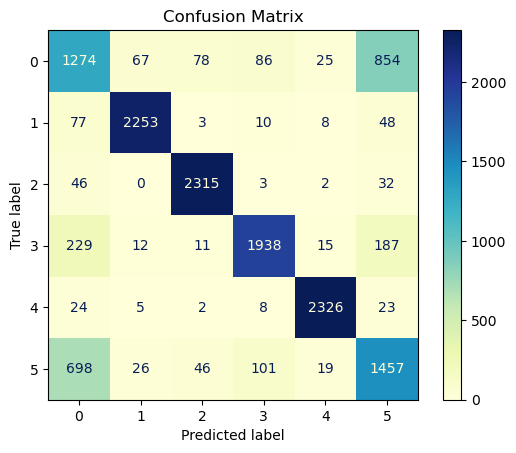

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.YlGnBu, values_format='d')  # 'd' ensures integers in the plot

plt.title('Confusion Matrix')
plt.show()

2) Linear SVC

In [17]:
lin_svc=LinearSVC()

In [18]:
model_svc = lin_svc.fit(x_train_tfidf,y_train)

In [19]:
y_pred_svc = lin_svc.predict(x_test_tfidf)

In [20]:
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
accuracy    = accuracy_score(y_test, y_pred_svc)

print("Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.50      0.52      2384
           1       0.94      0.95      0.95      2399
           2       0.94      0.97      0.96      2398
           3       0.87      0.82      0.85      2392
           4       0.97      0.98      0.97      2388
           5       0.55      0.58      0.57      2347

    accuracy                           0.80     14308
   macro avg       0.80      0.80      0.80     14308
weighted avg       0.80      0.80      0.80     14308

Accuracy: 0.8024182275649986


In [21]:
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print(conf_matrix_svc)

[[1197   90   95  124   32  846]
 [  61 2282    4   12    4   36]
 [  34    2 2331    9    2   20]
 [ 188   17   14 1967   16  190]
 [  18    7    1    3 2340   19]
 [ 759   21   37  142   24 1364]]


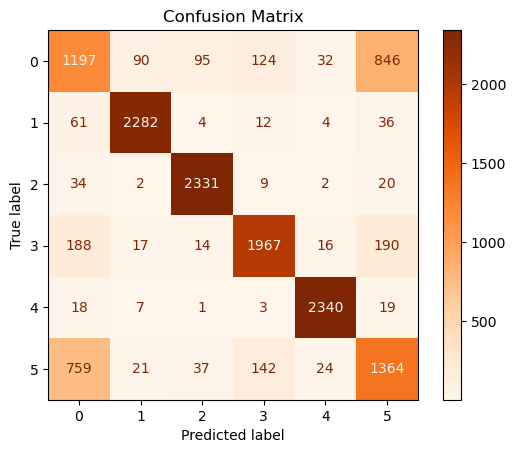

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svc, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Oranges, values_format='d')  # 'd' ensures integers in the plot

plt.title('Confusion Matrix')
plt.show()

3) Multinomial Naive Bayes

In [23]:
multinb= MultinomialNB()

In [24]:
model_nb = multinb.fit(x_train_tfidf,y_train)

In [25]:
y_pred_nb = multinb.predict(x_test_tfidf)

In [26]:
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
accuracy = accuracy_score(y_test, y_pred_nb)

print("Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.30      0.41      2384
           1       0.73      0.97      0.83      2399
           2       0.66      0.98      0.79      2398
           3       0.79      0.81      0.80      2392
           4       0.83      0.92      0.87      2388
           5       0.61      0.37      0.46      2347

    accuracy                           0.73     14308
   macro avg       0.71      0.72      0.69     14308
weighted avg       0.71      0.73      0.70     14308

Accuracy: 0.725398378529494


In [27]:
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(conf_matrix_nb)

[[ 704  376  481  204  142  477]
 [  10 2326   26   21   12    4]
 [   6   20 2345   13    7    7]
 [  88  111  104 1935   84   70]
 [   5   86   74   14 2201    8]
 [ 252  263  498  259  207  868]]


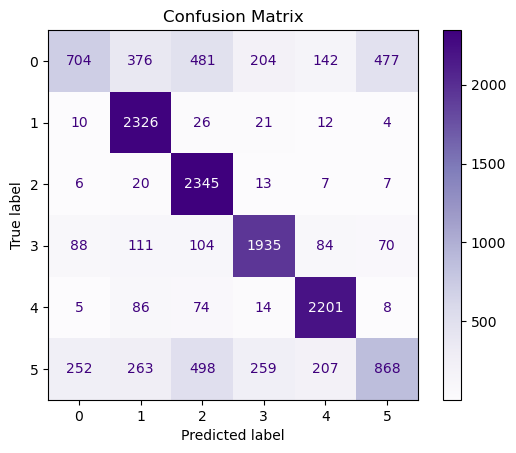

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nb, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Purples, values_format='d')  # 'd' ensures integers in the plot

plt.title('Confusion Matrix')
plt.show()

4) Decision Tree 

In [29]:
dicisiontree = DecisionTreeClassifier()

In [30]:
model_dt = dicisiontree.fit(x_train_tfidf,y_train)

In [31]:
y_pred_dt = dicisiontree.predict(x_test_tfidf)

In [32]:
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
accuracy = accuracy_score(y_test, y_pred_dt)

print("Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.45      0.47      2384
           1       0.94      0.93      0.93      2399
           2       0.97      0.96      0.97      2398
           3       0.83      0.82      0.82      2392
           4       0.98      0.97      0.97      2388
           5       0.49      0.55      0.52      2347

    accuracy                           0.78     14308
   macro avg       0.78      0.78      0.78     14308
weighted avg       0.78      0.78      0.78     14308

Accuracy: 0.7796337713167458


In [33]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(conf_matrix_dt)

[[1084   85   26  175   11 1003]
 [ 100 2220    4   24    9   42]
 [  49    2 2312    7    3   25]
 [ 179   18    4 1950    6  235]
 [  19   10    8   19 2306   26]
 [ 843   19   27  166    9 1283]]


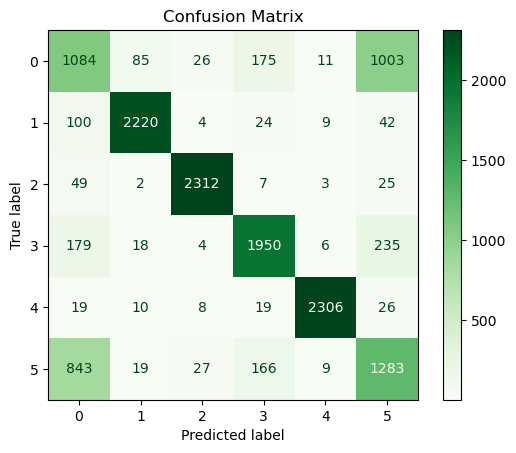

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Greens, values_format='d')  # 'd' ensures integers in the plot

plt.title('Confusion Matrix')
plt.show()

# Ensemble Learning 

1) Random forest

In [58]:
randomforest = RandomForestClassifier()

In [59]:
model_rf = randomforest.fit(x_train_tfidf,y_train)

In [60]:
y_pred_rf = randomforest.predict(x_test_tfidf)

In [61]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
accuracy = accuracy_score(y_test, y_pred_rf)
from sklearn.metrics import f1_score
f1_measure_rf = f1_score(y_test,y_pred_rf, average = 'macro')
print("F-measure:", f1_measure_rf)
print("Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.46      0.50      2384
           1       0.96      0.96      0.96      2399
           2       0.97      0.97      0.97      2398
           3       0.89      0.82      0.85      2392
           4       0.98      0.98      0.98      2388
           5       0.52      0.64      0.57      2347

    accuracy                           0.81     14308
   macro avg       0.81      0.81      0.81     14308
weighted avg       0.81      0.81      0.81     14308

F-measure: 0.8066064021358406
Accuracy: 0.8067514677103719


In [62]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)

[[1106   76   37   95   12 1058]
 [  50 2296    0   10    5   38]
 [  31    2 2334    4    3   24]
 [ 173   10    6 1966    6  231]
 [  11    6    2    1 2348   20]
 [ 672   10   21  141   10 1493]]


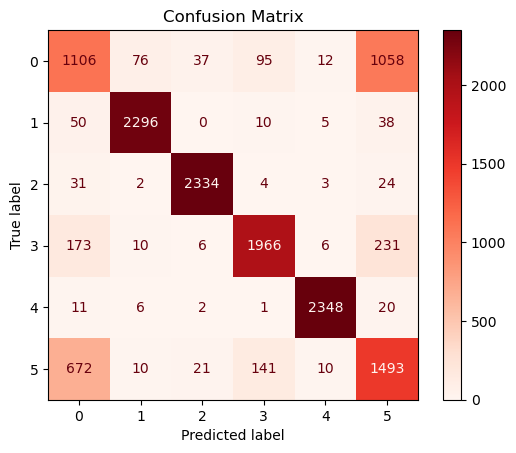

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Reds, values_format='d')  # 'd' ensures integers in the plot

plt.title('Confusion Matrix')
plt.show()

2) AdaBoost Classifier

In [64]:
adaboost = AdaBoostClassifier()

In [65]:
model_ada = adaboost.fit(x_train_tfidf,y_train)

In [66]:
y_pred_ada = adaboost.predict(x_test_tfidf)

In [67]:
print("Classification Report:\n", classification_report(y_test, y_pred_ada))
accuracy = accuracy_score(y_test, y_pred_ada)

print("Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.11      0.19      2384
           1       0.95      0.92      0.93      2399
           2       0.94      0.96      0.95      2398
           3       0.89      0.75      0.81      2392
           4       0.96      0.96      0.96      2388
           5       0.44      0.88      0.59      2347

    accuracy                           0.77     14308
   macro avg       0.79      0.77      0.74     14308
weighted avg       0.79      0.77      0.74     14308

Accuracy: 0.7653061224489796


In [68]:
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
print(conf_matrix_ada)

[[ 267   82   94   68   26 1847]
 [  11 2207    1   16   10  154]
 [  30    2 2304    3    2   57]
 [  72   11    6 1799   19  485]
 [  11    9    5   17 2304   42]
 [  76   22   32  121   27 2069]]


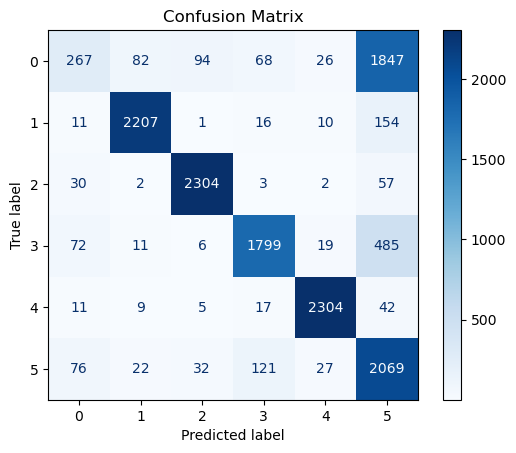

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ada, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues, values_format='d')  # 'd' ensures integers in the plot

plt.title('Confusion Matrix')
plt.show()

In [81]:
# Create a dictionary to store classification reports
final_results = {
    'Model 1': classification_report(y_test, y_pred_ada),
    'Model 2': classification_report(y_test, y_pred_lr),
    'Model 3': classification_report(y_test, y_pred_dt),
    'Model 4': classification_report(y_test, y_pred_nb),
    'Model 5': classification_report(y_test, y_pred_rf),
    'Model 6': classification_report(y_test, y_pred_svc),
}

# Create dataframes from classification reports
# df_reports = pd.DataFrame.from_dict(reports, orient='index', columns=['Classification Report'])


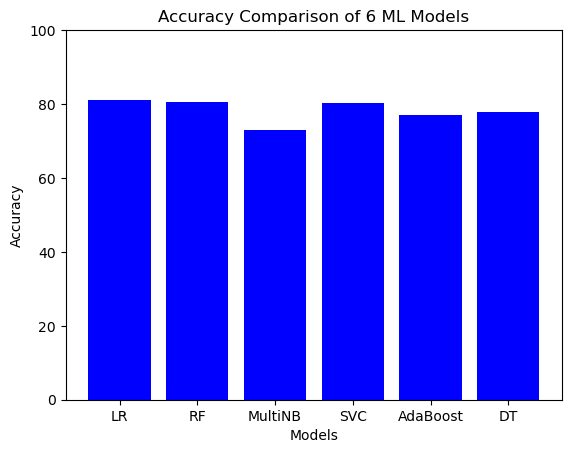

In [83]:
import matplotlib.pyplot as plt

# Example accuracies (replace with your actual accuracies)
accuracies = [81,80.6,73,80.24,77,77.9]

# Model names
models = ['LR', 'RF', 'MultiNB', 'SVC', 'AdaBoost', 'DT']

# Plotting the bar graph
plt.bar(models, accuracies, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of 6 ML Models')
plt.ylim(0, 100)  # Set y-axis limits to represent accuracy range (0 to 1)
plt.show()


# Bagging

Bagging using Logistic Regression

In [71]:
from sklearn.ensemble import BaggingClassifier

#logisticregression = LogisticRegression(random_state=42)
bagging = BaggingClassifier(base_estimator=log_reg, n_estimators=15, random_state=42)
bagging.fit(x_train_tfidf, y_train)
y_pred_bagging = bagging.predict(x_test_tfidf)
accuracy = accuracy_score(y_test, y_pred_bagging)
print("Accuracy:", accuracy)

Accuracy: 0.8050740844282919


Bagging using LinearSVC

In [72]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

#svm = SVC(kernel='linear', random_state=42)
bagging = BaggingClassifier(base_estimator=lin_svc, n_estimators=15, random_state=42)
bagging.fit(x_train_tfidf, y_train)
y_pred = bagging.predict(x_test_tfidf)
f1_measure_macro = f1_score(y_test, y_pred, average='macro')
print("F-measure:", f1_measure_macro)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

F-measure: 0.802321818648711
Accuracy: 0.8033268101761253


Bagging using a combination of different classifiers

In [73]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [74]:
svm = SVC(kernel='linear',random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
base_estimators = [svm, decision_tree, random_forest]
bagging = BaggingClassifier(base_estimator=None)
bagging.estimators_ = base_estimators
bagging.fit(x_train_tfidf, y_train)
y_pred = bagging.predict(x_test_tfidf)
f1_measure = f1_score(y_test,y_pred, average = 'macro')
print("F-measure:", f1_measure)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

F-measure: 0.7950068606970982
Accuracy: 0.7931227285434722


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

import numpy as np
# Base classifiers
base_estimators = [
    RandomForestClassifier(n_estimators=10, random_state=42),
    LinearSVC(random_state=42),
    DecisionTreeClassifier(random_state=42)
]

# Train base classifiers
predictions = []
for estimator in base_estimators:
    estimator.fit(x_train_tfidf, y_train)
    preds = estimator.predict(x_train_tfidf)
    predictions.append(preds)

# Convert predictions to features
X_train_stacked = np.column_stack(predictions)

# Neural network as the meta-estimator
meta_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_stacked.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train meta-estimator
meta_model.fit(X_train_stacked, y_train, epochs=10, batch_size=32)

# Make predictions on test data
predictions_test = []
for estimator in base_estimators:
    preds_test = estimator.predict(x_test_tfidf)
    predictions_test.append(preds_test)

X_test_stacked = np.column_stack(predictions_test)
y_pred_probs = meta_model.predict(X_test_stacked)
y_pred = (y_pred_probs > 0.5).astype(int)


In [ ]:
from sklearn.metrics import f1_score
f1_measure = f1_score(y_test,y_pred, average = 'macro')
print("F-measure:", f1_measure)
print("Classification Report:\n", classification_report(y_test, y_pred))

In [75]:
with open('logregmulticlass.pkl','wb') as f:
    pickle.dump(model_lr,f)

In [76]:
with open('logregmulticlass.pkl', 'rb') as model_file:
    model = pickle.load(model_file)
with open('tfidf_vectorizer_multiclass.pkl', 'rb') as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

In [ ]:
def categorize_text(input_text):
    x_input = tfidf_vectorizer.transform(input_text)
    category_prediction = model.predict(x_input)
    return category_prediction[0]



input_text = input("Enter the text to categorize: ")
result = categorize_text([input_text])


if result == 2:
    print("Text is categorized as Age Cyberbullying")
elif result == 1:
    print("Text is categorized as Religion Cyberbullying")
elif result == 3:
    print("Text is categorized as Gender Cyberbullying")
elif result == 4:
    print("Text is categorized as Ethnicity Cyberbullying")
elif result == 5:
    print("Text is categorized as Other Cyberbullying")
elif result == 0:
    print("Text is not categorized as Cyberbullying")
else:
    print("Invalid category")